# Student Performance Indicator

## Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

## 1) Problem statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
## 2) Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages

Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [36]:
df = pd.read_csv('data/student_info.csv')

Show Top 5 Records

In [37]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset

In [38]:
df.shape

(1000, 8)

### 2.2 Dataset Information


- Gender: Biological gender of students (male/female)
- Race/Ethnicity: Ethenicity of students (Group A/B/C/D/E)
- Parental level of education: Parent's highest level of eduction (bachelor's degree/some college/master's degree/associate's degree/high school)
- Lunch: Lunch eaten before test (standard or free/reduced)
- Test Preparation Course- Course completion status before test(conpleted/none)
- Maths score
- Reading score
- Writing score





## 3. Data Checks

- Missing values
- Duplicates
- Data type
- Number of unique values of each column
- Statistics of data set
- Various categories present in the different categorical column

### 3.1 Missing values

In [39]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No null values in the data set

### 3.2 Duplicates

In [40]:
df.duplicated().sum()

0

No duplicated values in the set

### 3.3 Check data types

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [42]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [43]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insights
- All means are quite close to each other
- The standard deviations are also pretty close
- The minimum score for maths (0) was much lower than the minimum scores for reading(17) & writing(10)

### 3.7 Exploring Data

In [44]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Getting categories

In [45]:
print("Categories in gender variable: ", end="")
print(df["gender"].unique())
print()
print("Categories in race_ethnicity variable: ", end="")
print(df["race_ethnicity"].unique())
print()
print("Categories in parental level of education  variable: ",end="")
print(df["parental_level_of_education"].unique())
print()
print("Categories of lunch variable: ",end="")
print(df["lunch"].unique())
print()
print("Categories of test prep course: ",end="")
print(df["test_preparation_course"].unique())

Categories in gender variable: ['female' 'male']

Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education  variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories of lunch variable: ['standard' 'free/reduced']

Categories of test prep course: ['none' 'completed']


Numerical & Categorical columns

In [46]:
numeric= [feature for feature in df.columns if df[feature].dtype =="int64"]
category= [feature for feature in df.columns if df[feature].dtype == "O"]

print("We have {} numerical features: {}".format(len(numeric), numeric))
print("\nWe have {} categorical features: {}".format(len(category), category))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### 3.8 "Total Score" & "Average" columns

In [47]:
df['total_score']= df['math_score']+ df['reading_score']+df['writing_score']
df['average_score']= df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [48]:
maths_full= (df['math_score']==100).sum()
writing_full= (df['writing_score']==100).sum()
reading_full= (df['reading_score']==100).sum()

print(f'Number of students who scored full marks in Maths: {maths_full}')
print(f'Number of students who scored full in Writing: {writing_full} ')
print(f'Number of students who scored full marks in Reading: {reading_full}')


Number of students who scored full marks in Maths: 7
Number of students who scored full in Writing: 14 
Number of students who scored full marks in Reading: 17


In [49]:
maths_20= (df['math_score']<=20).sum()
writing_20= (df['writing_score']<=20).sum()
reading_20= (df['reading_score']<=20).sum()

print(f'Number of students who got less than 20 marks in Maths: {maths_20}')
print(f'Number of students who got less tha 20 marks in Writing: {writing_20}')
print(f'Number of students who got less tha 20 marks in Reading: {reading_20}')

Number of students who got less than 20 marks in Maths: 4
Number of students who got less tha 20 marks in Writing: 3
Number of students who got less tha 20 marks in Reading: 1


##### Insights
- Performed the best in Reading
- Performed the worst in Maths

## 4. Exploring Data ( Visualization )

### 4.1 Visualize average score distribution to make some conclusion.

- Histogram
- Kernel Distribution Function (KDE)
#### 4.1.1 Histogram & KDE

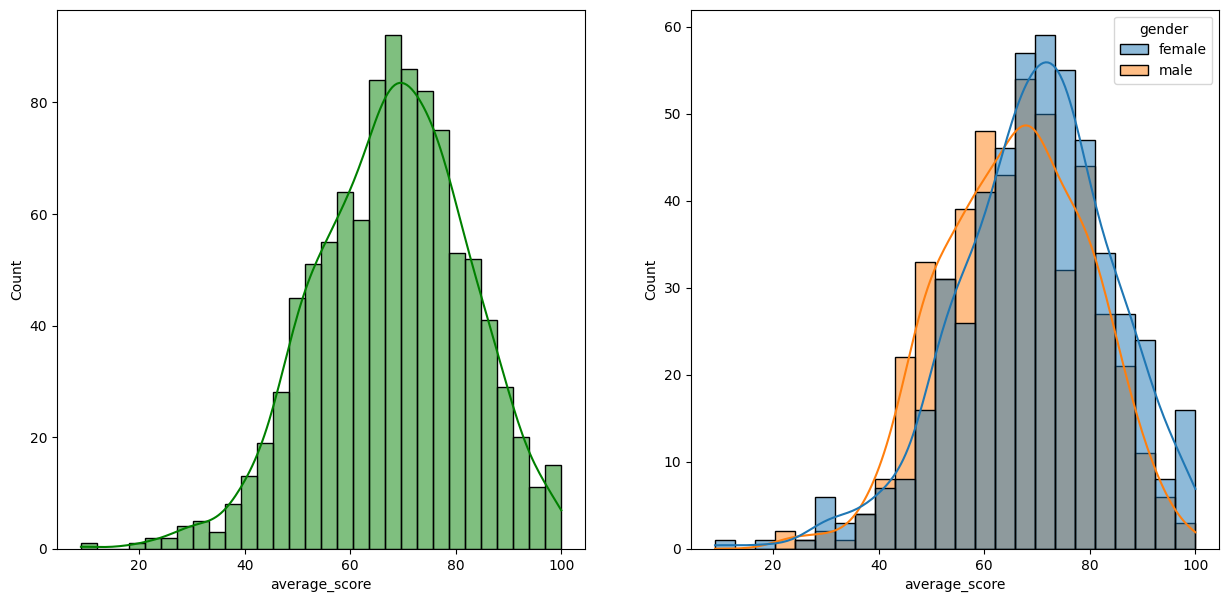

In [50]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x= 'average_score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='total_score', ylabel='Count'>

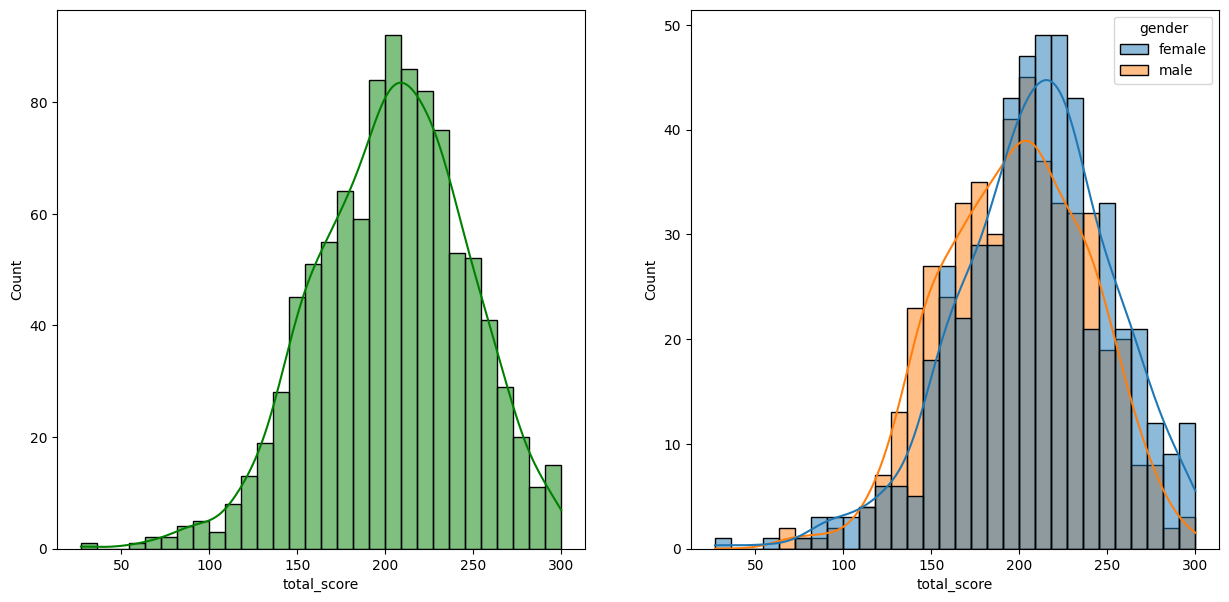

In [51]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, bins=30, x='total_score', kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, bins=30, x='total_score', kde=True, hue='gender')

##### Insights
- Female students performed better than their male counterparts

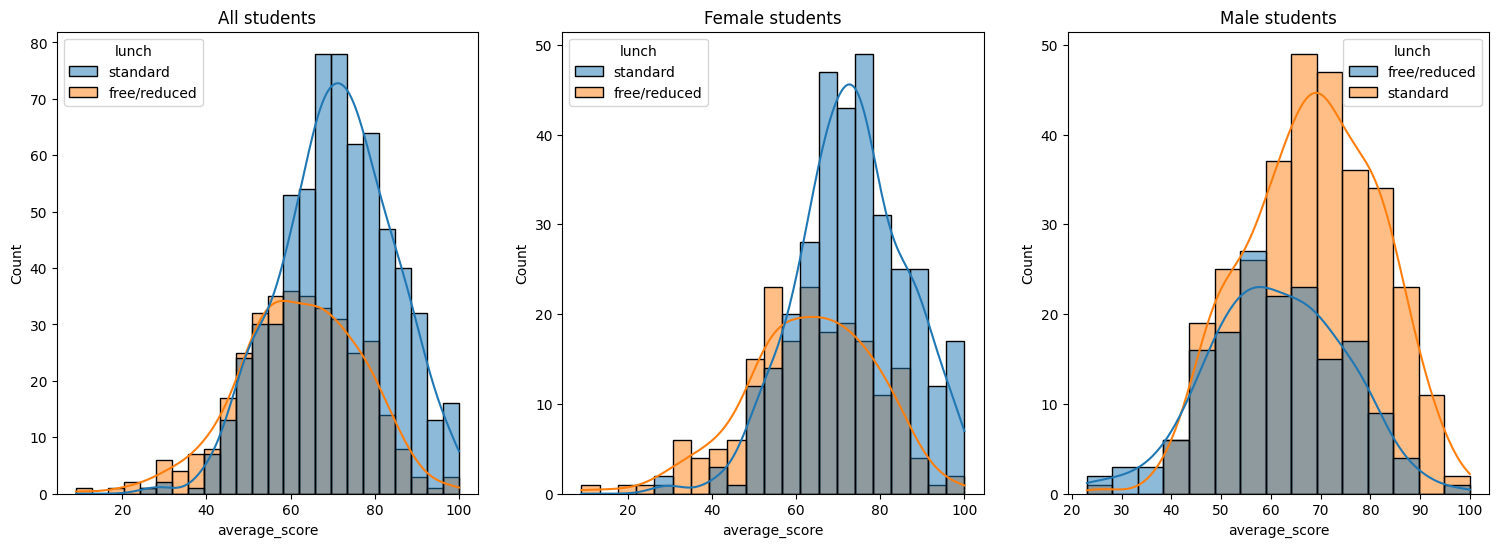

In [52]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='lunch')
plt.title("All students")

plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='lunch')
plt.title("Female students")

plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='lunch')
plt.title("Male students")

plt.show()

##### Insights
- Standard lunches help in better performance irrespective of gender

Text(0.5, 1.0, 'Male students')

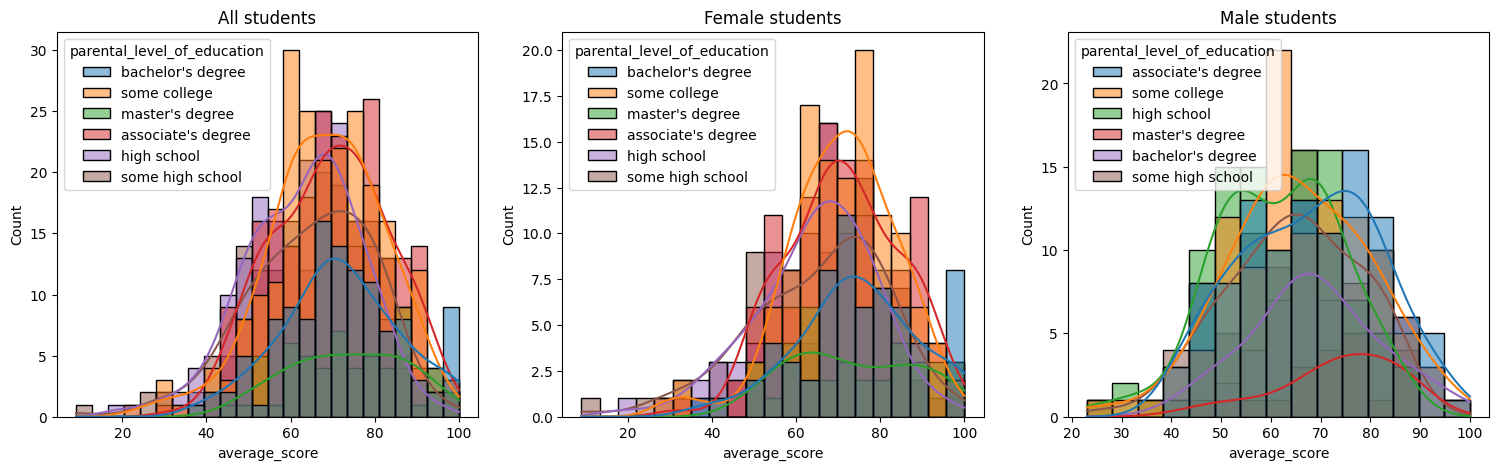

In [53]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.title('All students')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education' )
plt.title('Female students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education' )
plt.title('Male students')

##### Insights
- Generally speaking, parent's education has little to do with the performance of the student.

Text(0.5, 1.0, 'Male students')

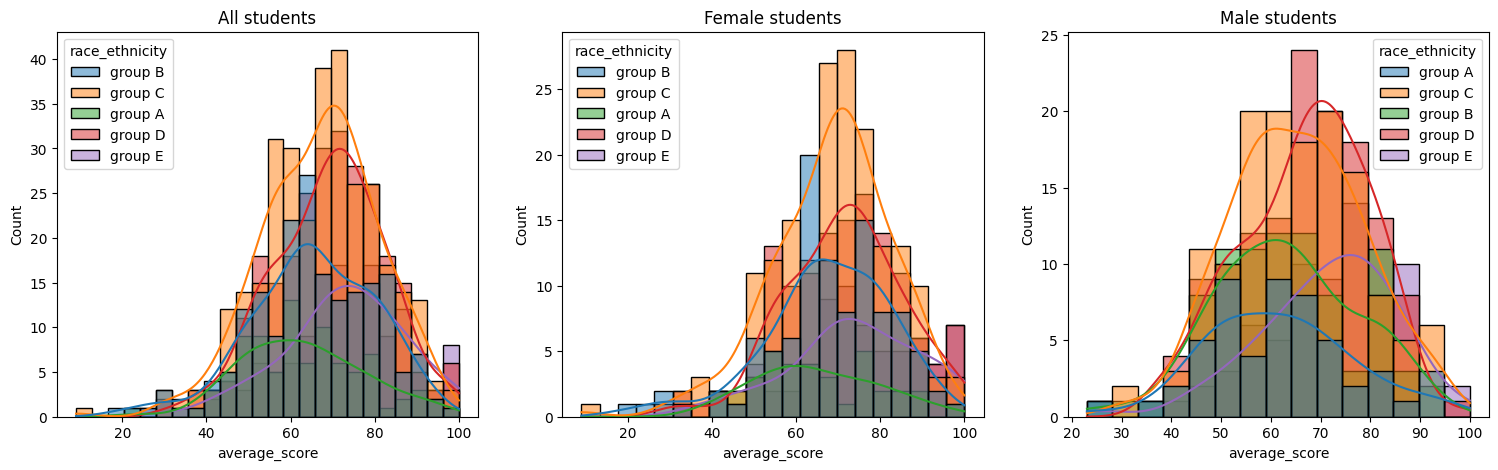

In [54]:
plt.subplots(1,3,figsize=(25,5))
plt.subplot(141)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity')
plt.title('All students')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='race_ethnicity')
plt.title('Female students')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='race_ethnicity')
plt.title('Male students')

##### Insights
- Generally, Group A and B do worse in the exam irrespective of gender
- In males, not only group A and B do poorly but so does group C


#### 4.2 Maximumum score of students in all three subjects

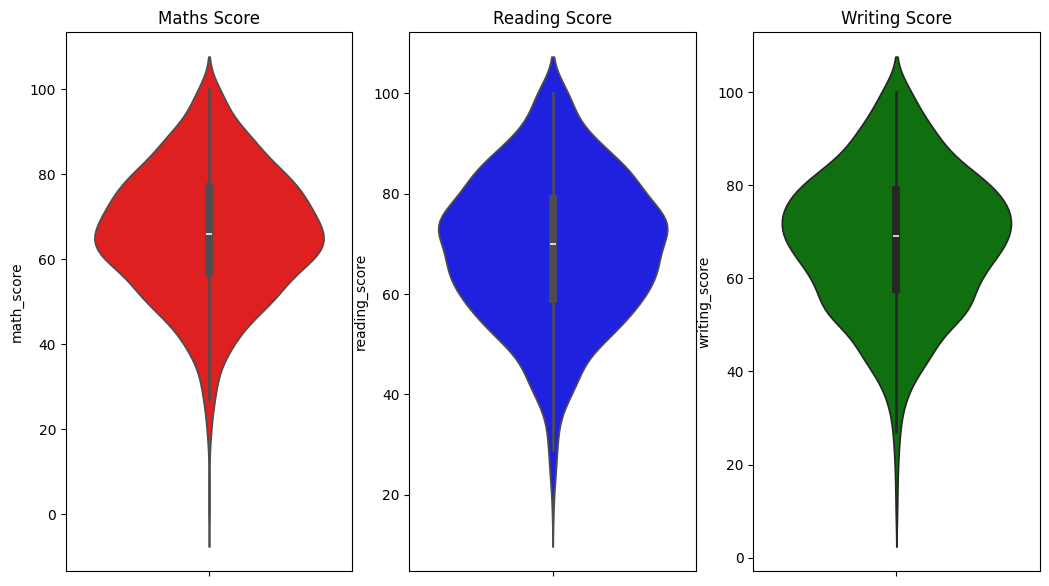

In [55]:
plt.subplots(1,3,figsize=(17,7))
plt.subplot(141)
sns.violinplot(data=df, y='math_score', color='r')
plt.title("Maths Score")

plt.subplot(142)
sns.violinplot(data=df, y='reading_score', color='b')
plt.title('Reading Score')

plt.subplot(143)
sns.violinplot(data=df, y='writing_score', color= 'g')
plt.title('Writing Score')

plt.show()

##### Insights
- Most students scored between 60-80 marks in Maths
- In Reading & Writing students scored between 50-85 marks

#### 4.3 Multivariate analysis using pieplot

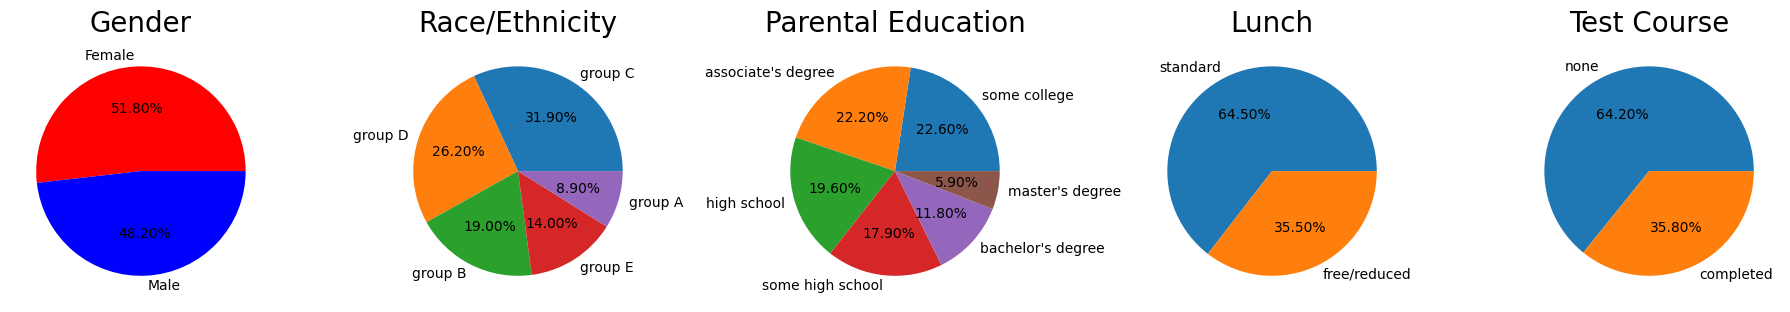

In [56]:
plt.subplots(1,5, figsize=(18,7))

plt.subplot(151)
gender_count= df['gender'].value_counts()
plt.pie(gender_count, labels= ['Female', 'Male'], colors= ['red', 'blue'],autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)

plt.subplot(152)
race_count= df['race_ethnicity'].value_counts()
plt.pie(race_count, labels=['group C', 'group D', 'group B', 'group E', 'group A' ], autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize= 20)

plt.subplot(153)
p_educatiion_count= df['parental_level_of_education'].value_counts()
p_labels=['some college',
           "associate's degree", 
           'high school',
           'some high school' ,
           "bachelor's degree","master's degree"]
plt.pie(p_educatiion_count, labels=p_labels, autopct= '%.2f%%')
plt.title('Parental Education', fontsize = 20)

plt.subplot(154)
lunch_count= df['lunch'].value_counts()
plt.pie(lunch_count, labels=['standard', 'free/reduced'], autopct= '%.2f%%')
plt.title('Lunch', fontsize=20)

plt.subplot(155)
prep_count= df['test_preparation_course'].value_counts()
plt.pie(prep_count, labels=['none','completed'], autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.tight_layout()

plt.show()

##### Insights
- The number of males and females is about equal.
- The majority group is C.
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree" and parents with a masters(the highest level) were in the minority which makes sense.
- Number of students who ate a standard lunch are greater
- Number of students who did not enrolled in any test preparation course is greater


#### 4.4

##### 4.4.1 Gender 

- Gender distribution
- Impact of gender on student performance

#### Univariate Analysis (Gender Distribution)

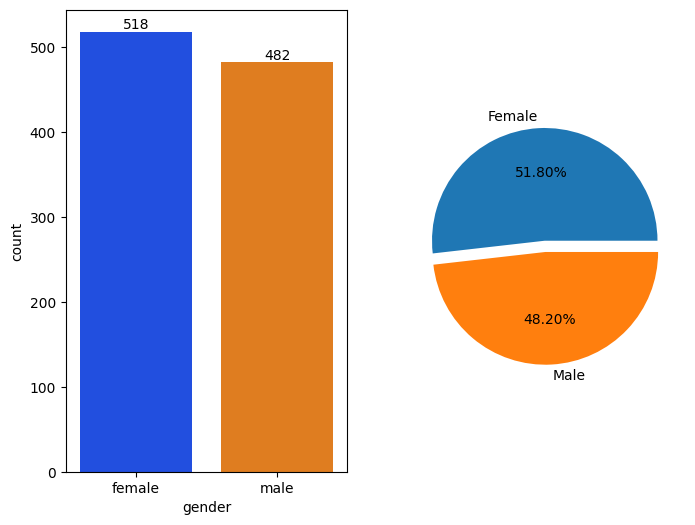

In [57]:

fig, axs= plt.subplots(1,2, figsize=(8,6))

plt.subplot(121)
sns.countplot(data=df,palette='bright', x=df['gender'], ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container)

plt.subplot(122)

plt.pie(x=gender_count, labels=['Female','Male'], explode=[0,0.1], autopct='%.2f%%')

plt.show()

##### Insights
- Data has approximately balanced sex ratio

#### BIVARIATE ANALYSIS (Impact of gender on student performance)


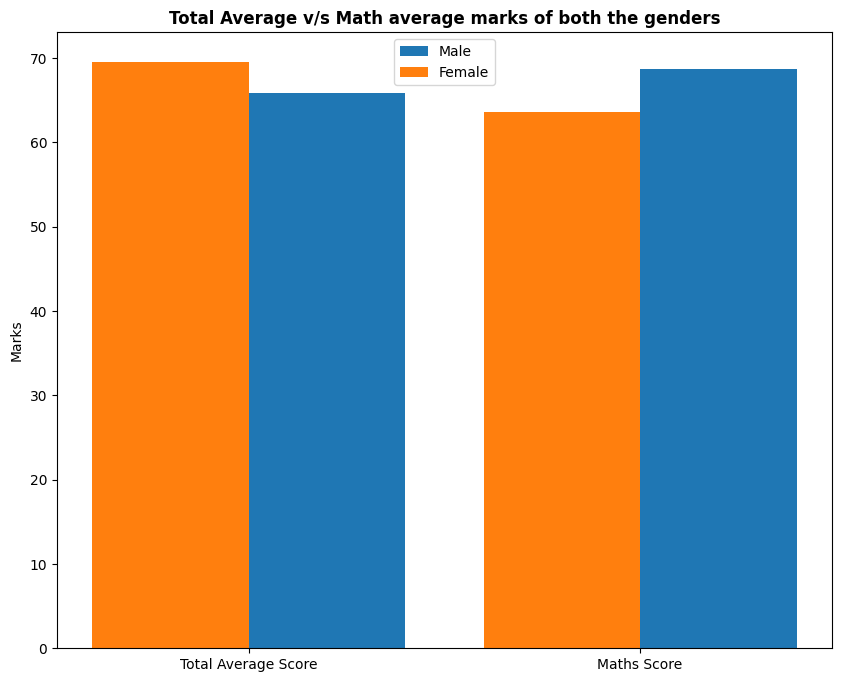

In [58]:
num_df= df.select_dtypes(include=[np.number])
num_df['gender']= df['gender']
gender_group= num_df.groupby('gender').mean()

plt.figure(figsize=(10,8))

female_scores= [gender_group['average_score'][0], gender_group['math_score'][0]]
male_scores= [gender_group['average_score'][1], gender_group['math_score'][1]]

X=['Total Average Score', 'Maths Score']
X_axis= np.arange(len(X))

plt.bar(X_axis+0.2 , male_scores, 0.4,  label = 'Male')
plt.bar(X_axis-0.2 , female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

##### Insights
- Female students do better overall going be the total average score (Maths+ Reading+Writing)
- Male students do better in Maths on average

##### 4.4.2 Race/Ethnicity
- Race wise distribution
- Impact of race on performance

#### Univariate Analysis

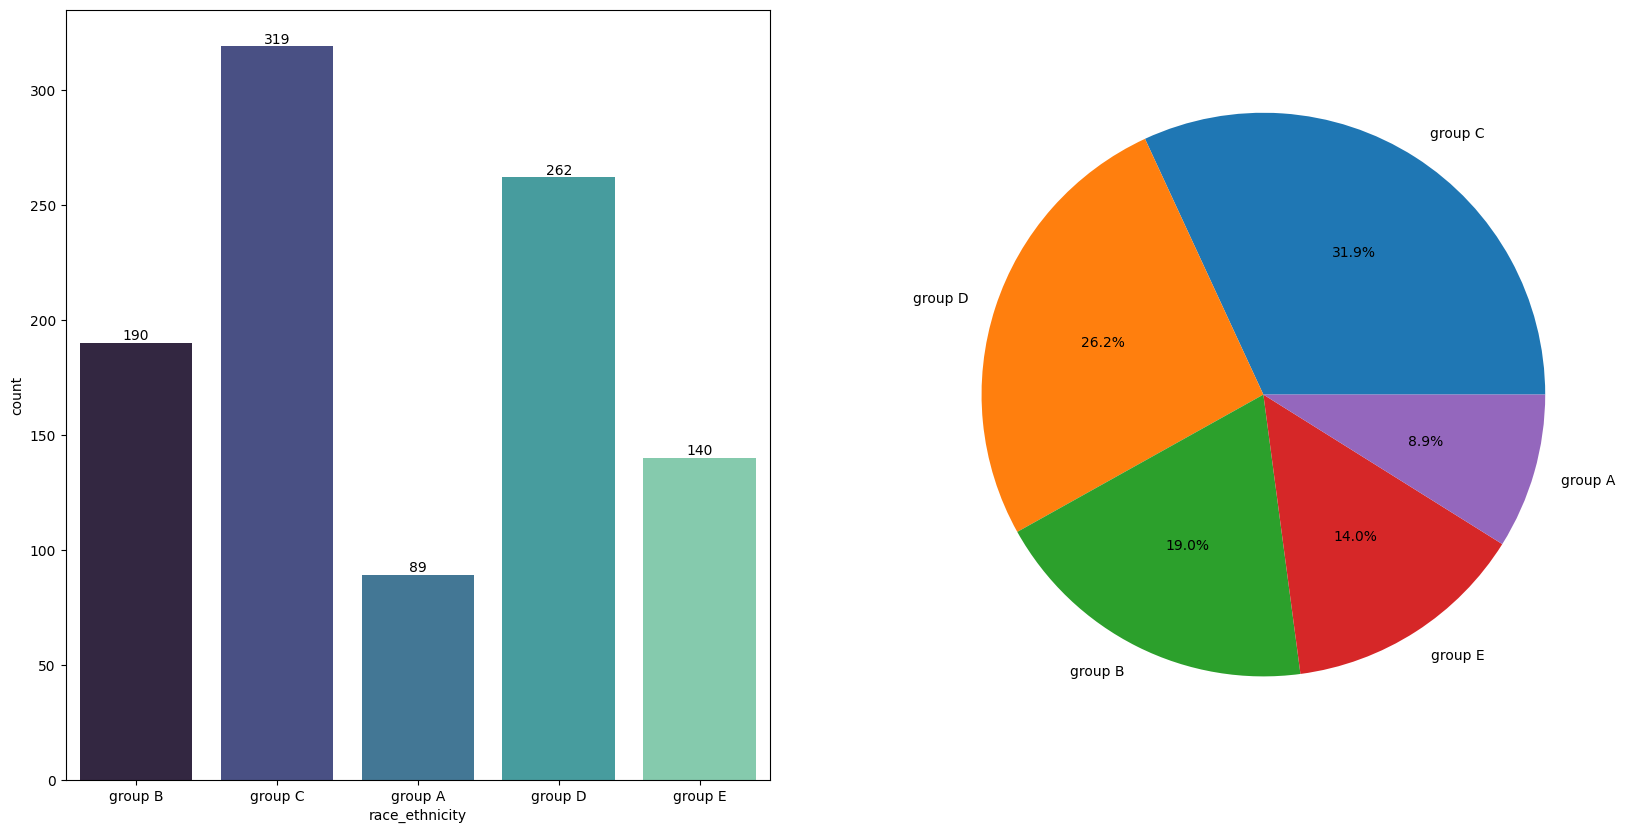

In [59]:
fig ,axs= plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df, x=df['race_ethnicity'], palette='mako', ax=axs[0])
for container in axs[0].containers:
    axs[0].bar_label(container)

plt.subplot(122)
plt.pie(x=df['race_ethnicity'].value_counts(), labels= df['race_ethnicity'].value_counts().index,autopct='%1.1f%%')
plt.show()

##### Insights
- Most students belong to Group C or D
- Students in group A are in the minority


#### BIVARIATE ANALYSIS ( Does Race/Ehnicity has any impact on student's performance ? )

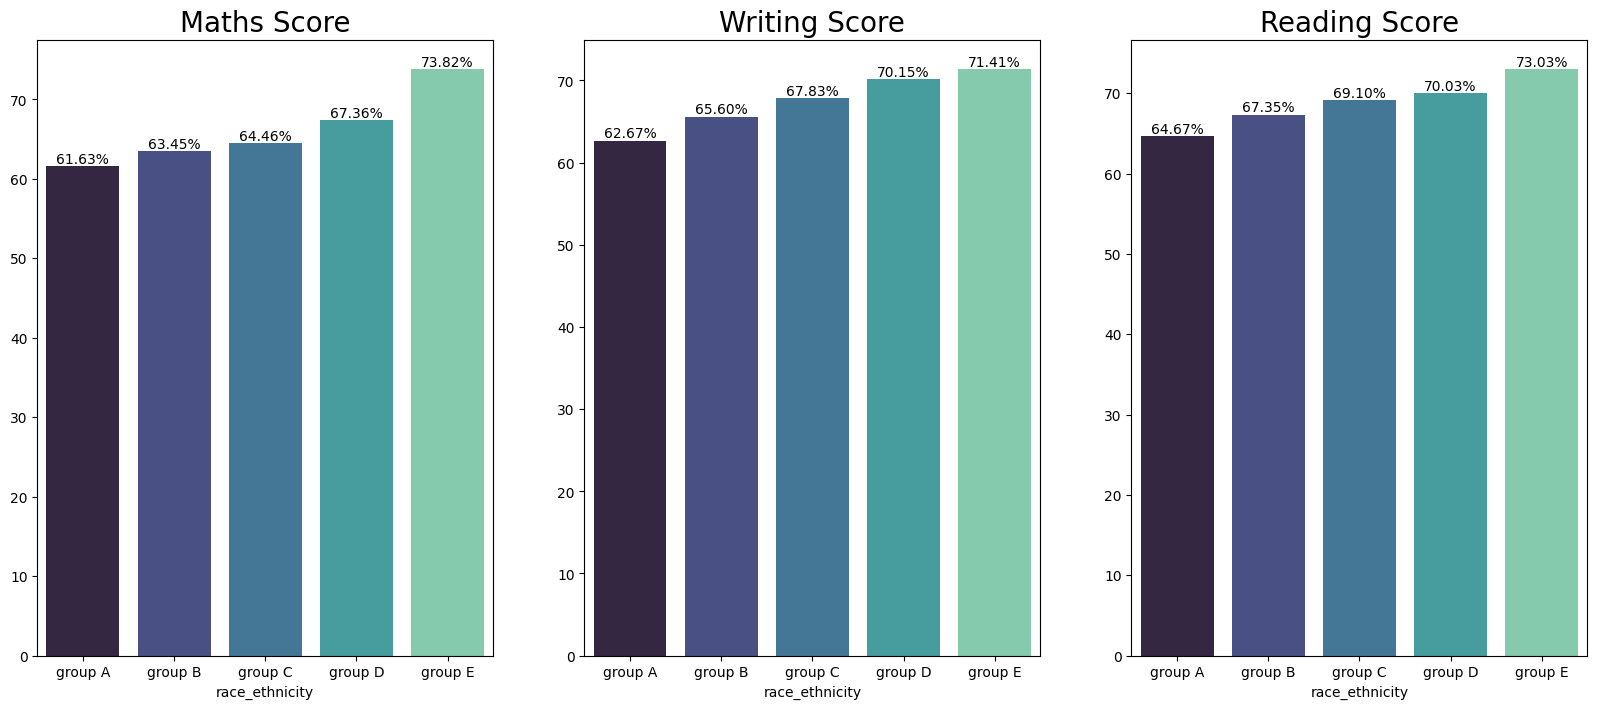

In [60]:
num_df_2= df.select_dtypes(include= [np.number])
num_df_2['race_ethnicity']= df['race_ethnicity']
race_df= num_df_2.groupby('race_ethnicity').mean()

f, axs= plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=race_df['math_score'].index, y= race_df['math_score'].values, ax= axs[0], palette='mako')
axs[0].set_title('Maths Score', fontsize='20')
for container in axs[0].containers:
    axs[0].bar_label(container, fmt='%.2f%%')

sns.barplot(x=race_df['writing_score'].index, y= race_df['writing_score'].values, ax= axs[1], palette='mako')
axs[1].set_title('Writing Score', fontsize='20')
for container in axs[1].containers:
    axs[1].bar_label(container,fmt='%.2f%%')


sns.barplot(x=race_df['reading_score'].index, y= race_df['reading_score'].values, ax= axs[2], palette='mako')
axs[2].set_title('Reading Score',fontsize='20')
for container in axs[2].containers:
    axs[2].bar_label(container,fmt='%.2f%%')

plt.show()

##### Insights 
- Group E scored the most in all parts of the exam
- Group A scored the least in all parts of the exams


#### 4.4.3 PARENTAL LEVEL OF EDUCATION
- Educational background of student's parent
- Impact on performance

##### UNIVARIATE ANALYSIS

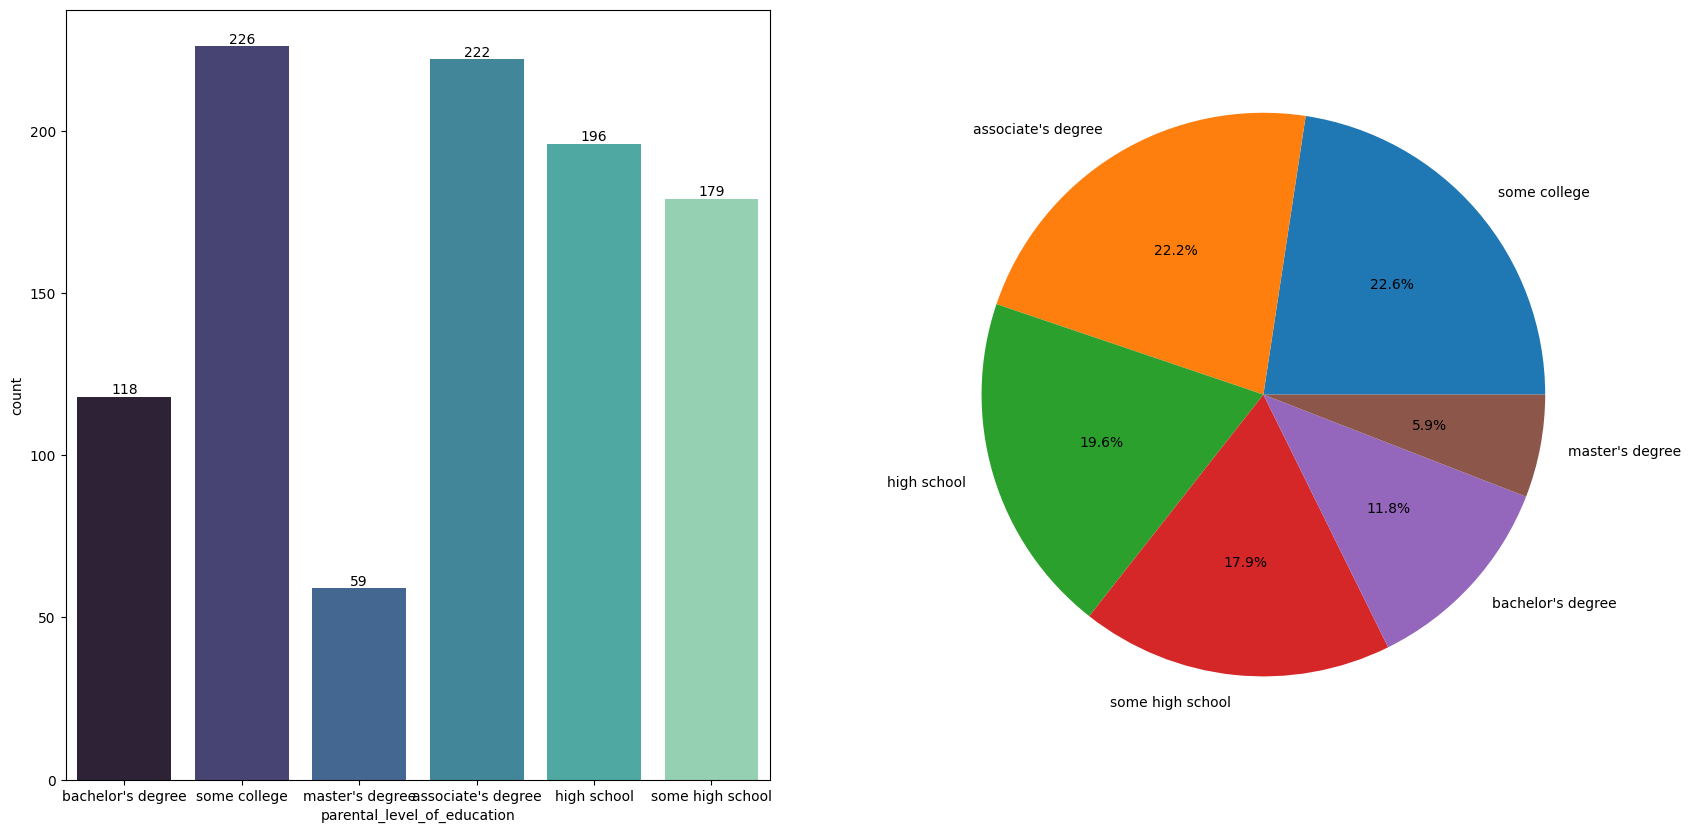

In [69]:
fig, axs= plt.subplots(1,2,figsize=(20,10))
plt.subplot(121)
sns.countplot(data=df, x=df['parental_level_of_education'], ax=axs[0], palette='mako')
for container in axs[0].containers:
    axs[0].bar_label(container)

plt.subplot(122)
plt.pie(x=df['parental_level_of_education'].value_counts(), labels= df['parental_level_of_education'].value_counts().index,autopct='%1.1f%%' )

plt.show()

##### Insights
- Most parents went to some college or got an associate's degree


#### BIVARIATE ANALYSIS

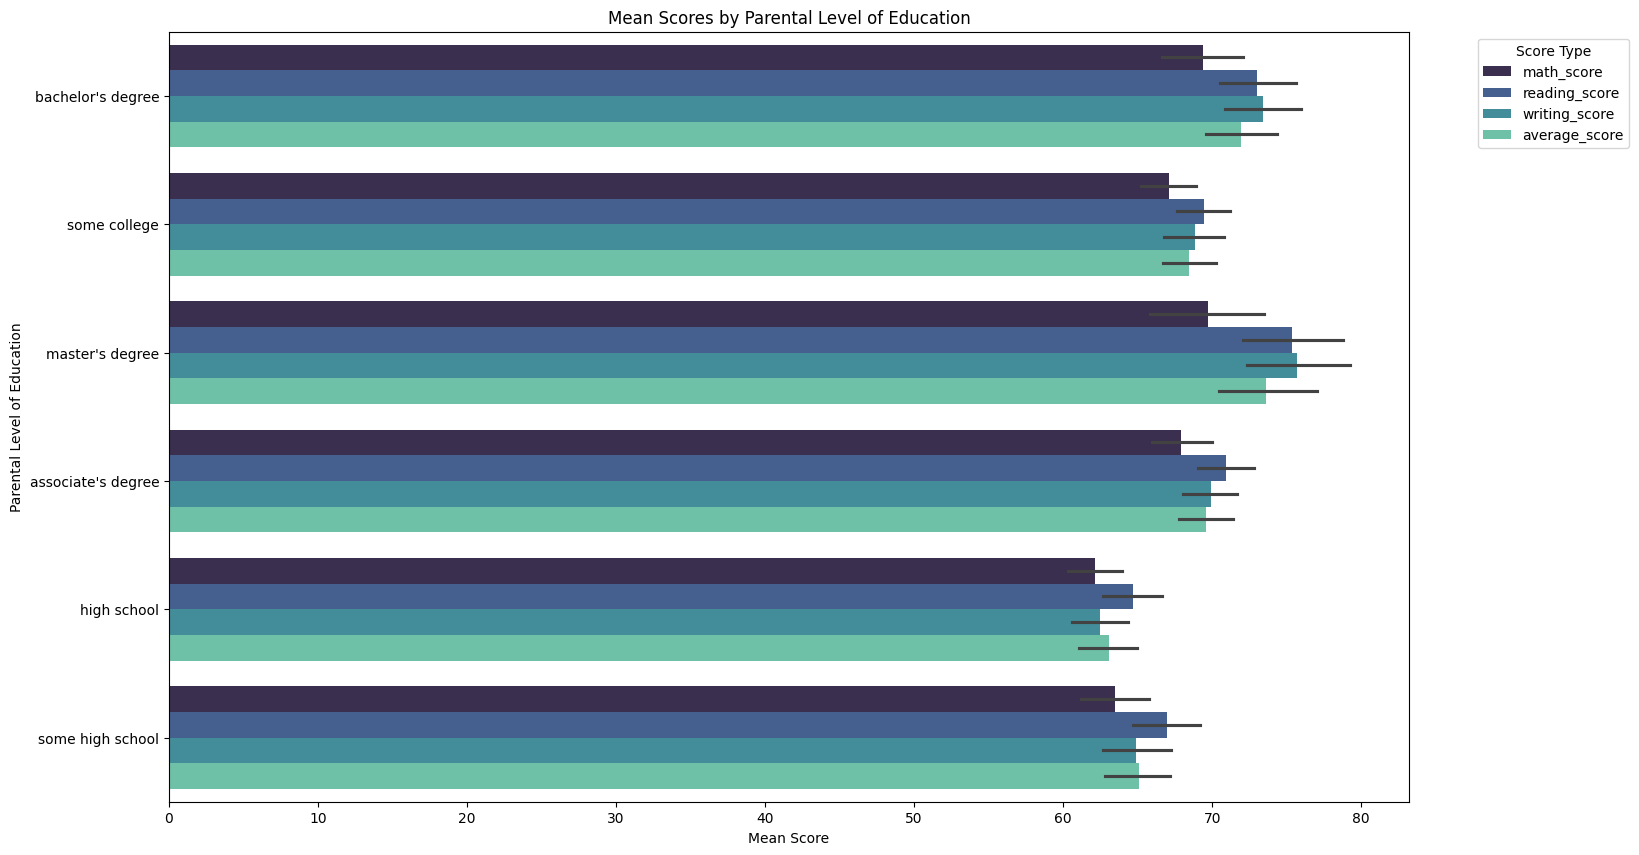

In [103]:
melted_df = pd.melt(df, id_vars=['parental_level_of_education'], 
                    value_vars=['math_score', 'reading_score', 'writing_score', 'average_score'], 
                    var_name='score_type', value_name='mean_score')


plt.figure(figsize=(16, 10))
sns.barplot(data=melted_df, x='mean_score', y='parental_level_of_education', hue='score_type', palette='mako')
plt.title('Mean Scores by Parental Level of Education')
plt.xlabel('Mean Score')
plt.ylabel('Parental Level of Education')
plt.legend(title='Score Type', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

##### Insights
- Score of students with parents with masters degrees was the highest on average, followed by students with parents with bachelor's degrees.


#### 4.4.4 LUNCH
- Effect of lunch on performance

##### Univariate Analysis

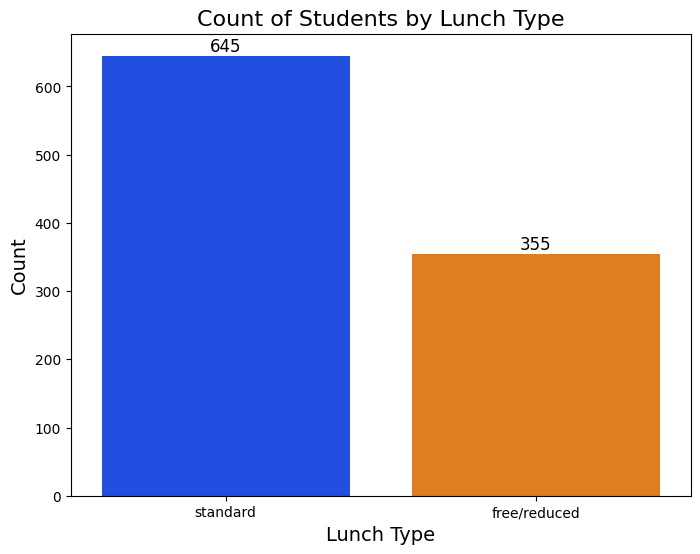

In [110]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='lunch', palette='bright')


for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, color='black')

plt.title('Count of Students by Lunch Type', fontsize=16)
plt.xlabel('Lunch Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

##### Insight
- Standard lunch was served by almost double the amount

##### BIVARIATE ANALYSIS 

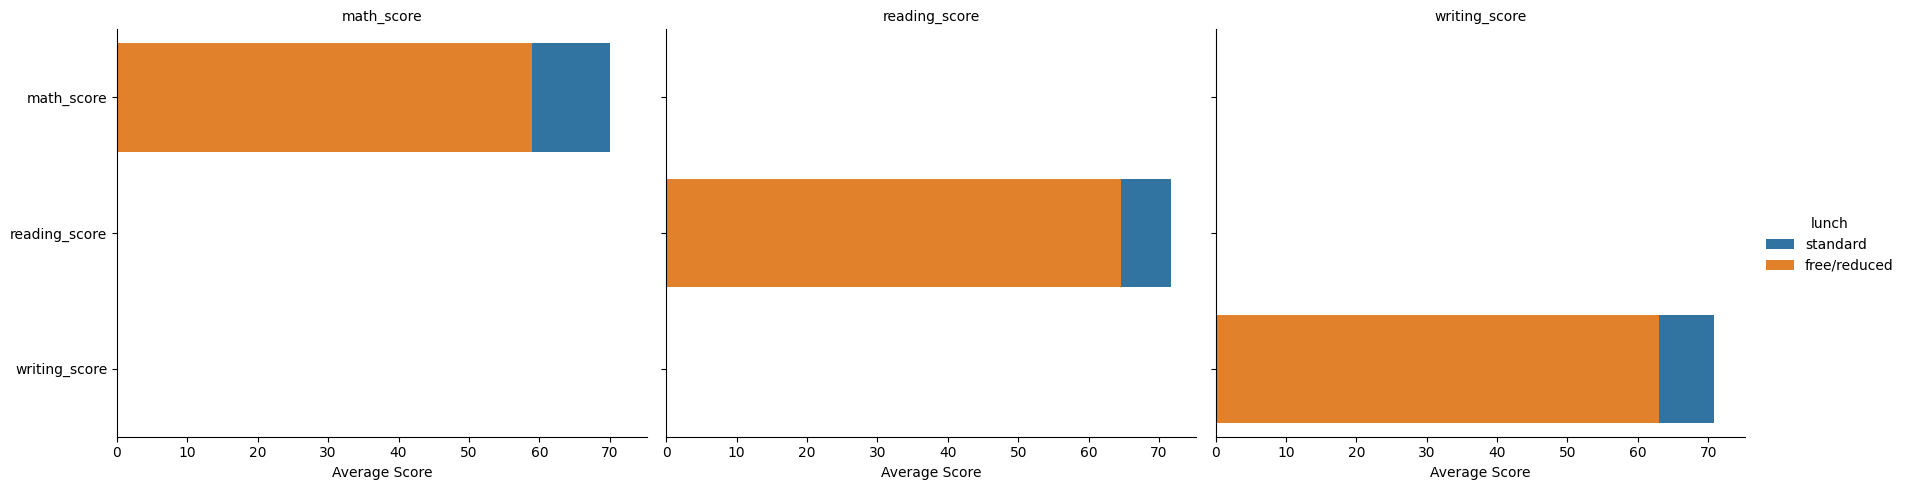

In [122]:
df_long = pd.melt(df, id_vars='lunch', value_vars=['math_score', 'reading_score', 'writing_score'],
                  var_name='Score Type', value_name='Score')

#FacetGrid
g = sns.FacetGrid(df_long, col='Score Type', hue='lunch', col_wrap=3, height=5, aspect=1.2)
g.map(sns.barplot, 'Score', 'Score Type', order=['math_score', 'reading_score', 'writing_score'], ci=None)
g.add_legend()

g.set_axis_labels('Average Score', '')
g.set_titles('{col_name}')

plt.show()


##### Insights
- Students who had a standard lunch performed better than students who got free/reduced lunch.

#### 4.4.5 TEST PREPARATION COURSE
- Does test preparation help in better performance?

#### Bivariate Analysis

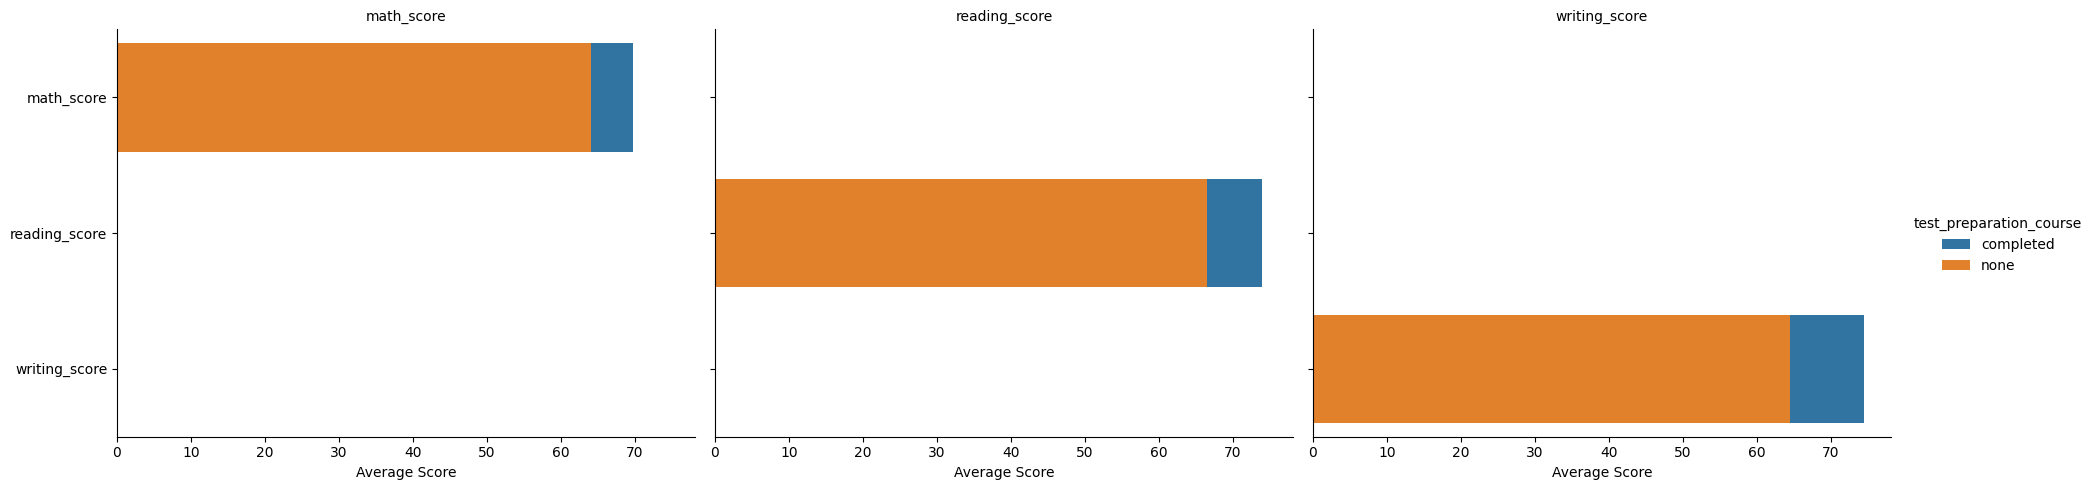

In [149]:
df_long = pd.melt(df, id_vars='test_preparation_course', value_vars=['math_score', 'reading_score', 'writing_score'],
                  var_name='Score Type', value_name='Score')

#FacetGrid
g = sns.FacetGrid(df_long, col='Score Type', hue='test_preparation_course',hue_order=['completed','none'], col_wrap=3, height=5, aspect=1.3)
g.map(sns.barplot, 'Score', 'Score Type', order=['math_score', 'reading_score', 'writing_score'], ci=None)
g.add_legend()
g.set_axis_labels('Average Score', '')
g.set_titles('{col_name}')
plt.show()

##### Insights
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


### 4.6 Outliers

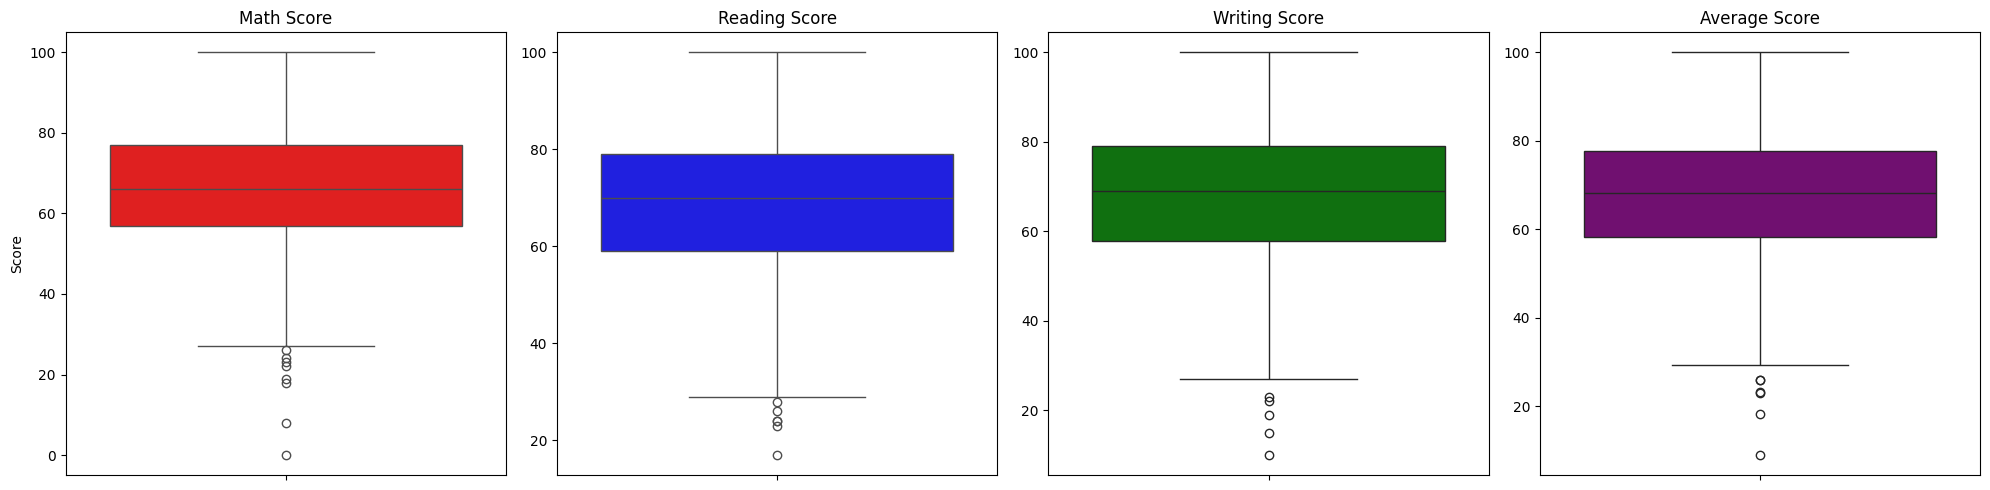

In [159]:
plt.subplots(1, 4, figsize=(20, 5))

plt.subplot(141)
sns.boxplot(y=df['math_score'], color='r')
plt.title('Math Score')
plt.ylabel('Score')
plt.xlabel('')

plt.subplot(142)
sns.boxplot(y=df['reading_score'], color='b')
plt.title('Reading Score')
plt.ylabel('')
plt.xlabel('')

plt.subplot(143)
sns.boxplot(y=df['writing_score'], color='g')
plt.title('Writing Score')
plt.ylabel('')
plt.xlabel('')

plt.subplot(144)
sns.boxplot(y=df['average_score'], color='purple')
plt.title('Average Score')
plt.ylabel('')
plt.xlabel('')

plt.tight_layout()
plt.show()










### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

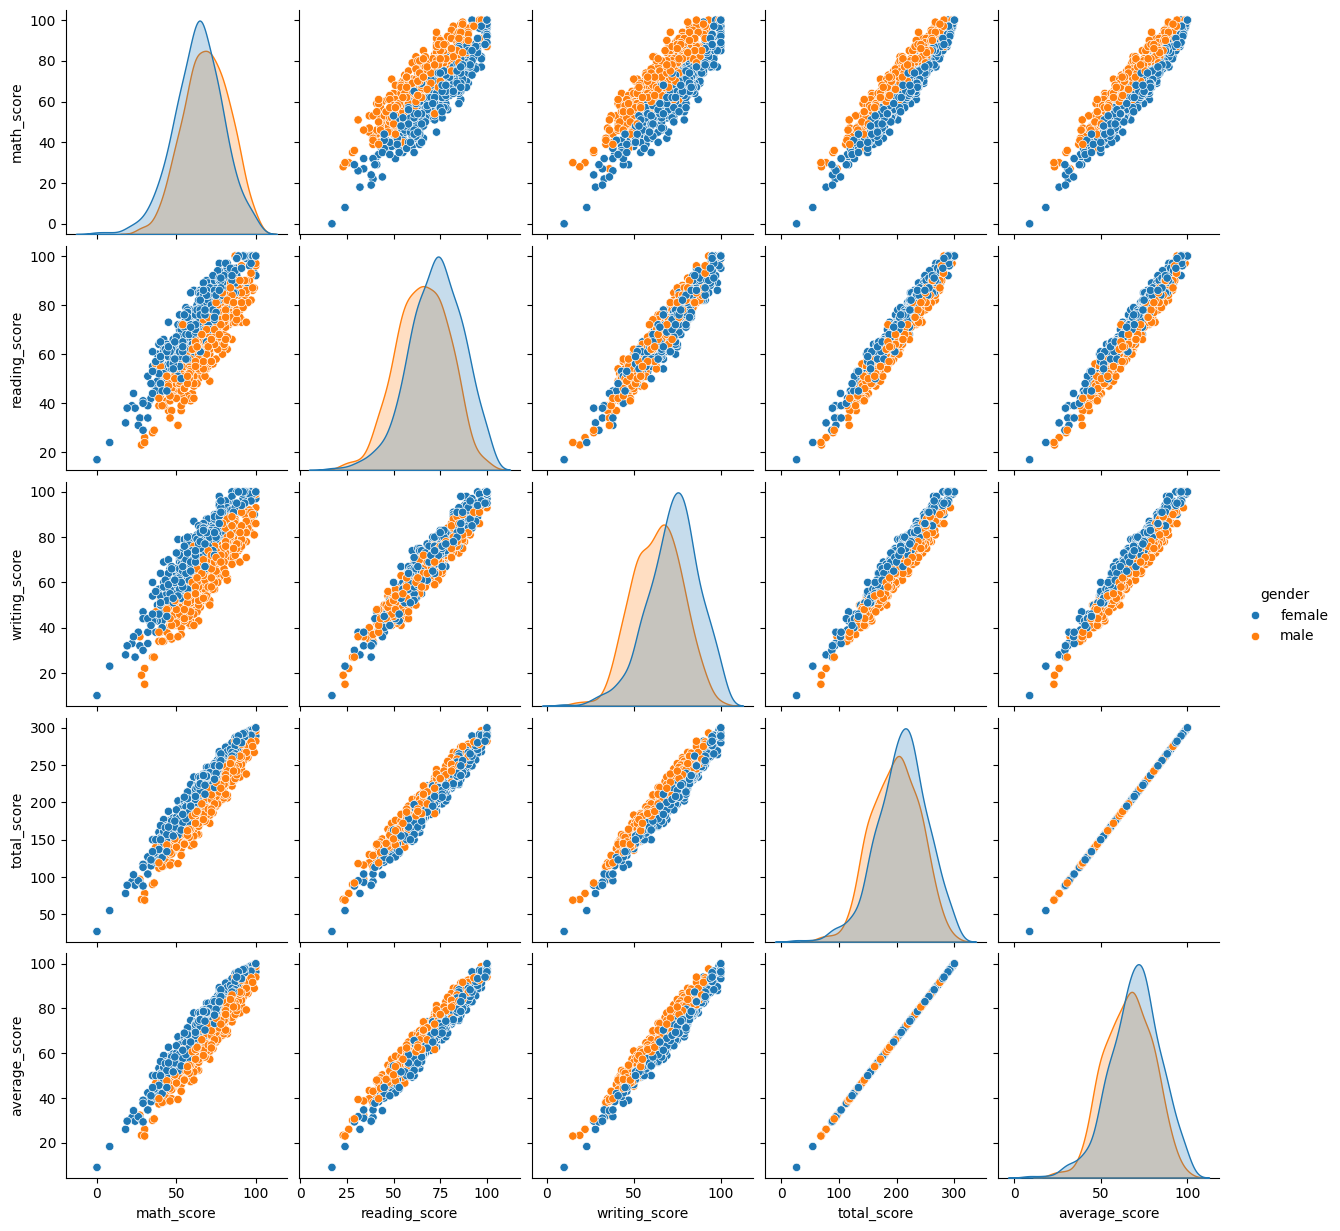

In [160]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
- All scores have a strong positive correlation 


## Conclusions

- Student's Performance is related to race, parental level of education
- Females lead in pass percentage and also are top-scorers
- Males did better only in maths
- Student's Performance is better with standard lunch
- Finishing preparation course is benefitial